Jacob Mitchell, RIN: 662025573

## Question 1

**(10 pts.) Use the Iris dataset and the SVM code shown in the first class. Define two
new features using the original four features and then calculate the accuracy score of
classification. The SVM classifier must use the new features and none of the original
features for classification**

The below code uses the *sepal length to petal length ratio* and *sepal width to petal width ratio* as the two new features,  obtaining an accuracy score of >90%

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from keras.datasets import mnist
from collections import Counter

In [12]:
iris = datasets.load_iris()
lratio = iris.data[:, :1]/iris.data[:, 2:3] # sepal length to petal length ratio
wratio = iris.data[:, 1:2]/iris.data[:, 3:4] # sepal width to petal width ratio
X = np.column_stack((lratio, wratio))
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

clf = svm.SVC()
clf.fit(X_train, y_train)

acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9333333333333333


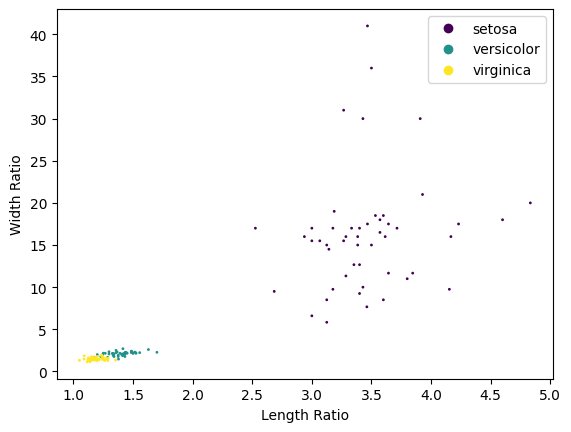

In [ ]:
plot = plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel('Length Ratio')
plt.ylabel('Width Ratio')
plt.legend(handles=plot.legend_elements()[0], labels=iris.target_names.tolist())

## Question 2

**(30 pts.) Classify only the even numbered handwritten digits using MNIST digits dataset
with a k-nearest neighbors classifier. The classifier must not see any odd numbered digit
images as inputs. The classifier must also consider every pixel in the input image to
make its classification decision. Can we use pairplot to visualize this data?. Plot the the
classification results using a heatmap showing digits which were correctly classified and
digits which were not correctly classified. How many 6’s in your test set were correctly
classified?**

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

odd_indices_train = [i for i in range(len(y_train)) if y_train[i] % 2 == 1]
odd_indices_test = [i for i in range(len(y_test)) if y_test[i] % 2 == 1]

x_train = np.delete(x_train, odd_indices_train, axis=0)
y_train = np.delete(y_train, odd_indices_train, axis=0)
x_test = np.delete(x_test, odd_indices_test, axis=0)
y_test = np.delete(y_test, odd_indices_test, axis=0)

x_train = x_train.reshape(x_train.shape[0], -1)  # Shape: (n_samples, n_features)
x_test = x_test.reshape(x_test.shape[0], -1)

# Fit K-Nearest Neighbors model
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**A pairplot could be used, but it wouldn't be helpful in categorizing the data since it would result in a 64x64 grid of plots which can't be analyzed very easily compared to other analysis tecniques. A heatmap would be best as shown below.**


In [ ]:
pred = skmodel.predict(x_test)
cm_sk = confusion_matrix(y_test, pred)

ax = sns.heatmap(cm_sk, linewidths=2, annot=True, cmap='viridis', fmt="d", cbar=True)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticklabels([0,2,4,6,8])
ax.set_yticklabels([0,2,4,6,8])

**949 of the 958 total 6's in the set were correctly guessed, resulting in an accuracy score of 99.06%**

# Question 3

Cluster the Iris species by writing your own k-means algorithm using THREE
features (Or modify the algorithm we used in class). Show visualization of the data using a THREE dimensional scatter plot. Compare the clustering performance of your k-means algorithm to the sklearn implementation by making plots of the clusters from your method and Scikit’s implementation by showing the clusters from your methods and from Scikit’s method. What happens when you vary the number of clusters?

PLOT USING KNN CLASSIFIER

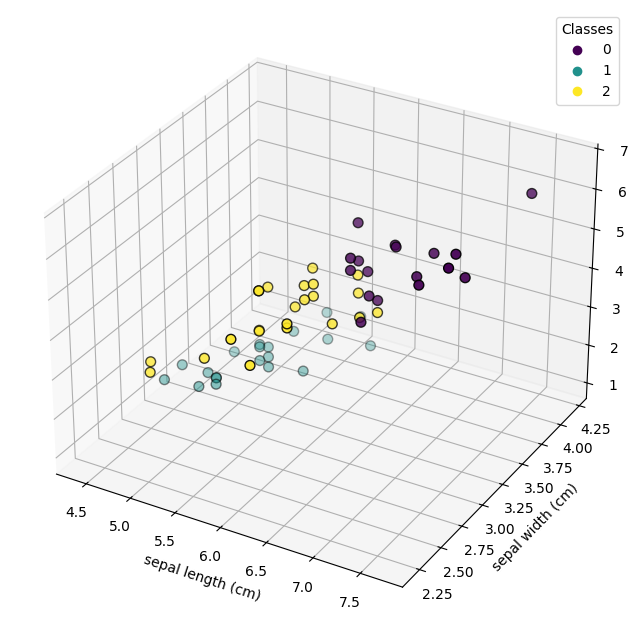

In [75]:
class KMeans_custom:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

#NOTE: y isn't used later, only x
iris = datasets.load_iris()
X = iris.data[:,:3]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

model = KMeans_custom(k=3)
model.fit(X_train)
preds_1 = model.predict(X_test)
cluster_coords = model.centroids

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_test[:, 0], X_test[:, 1], X_test[:, 2],
    c=preds_1, cmap='viridis', s=50, edgecolor='k'
)

ax.legend(handles=scatter.legend_elements()[0], loc="upper right", title="Classes")

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])

plt.show()

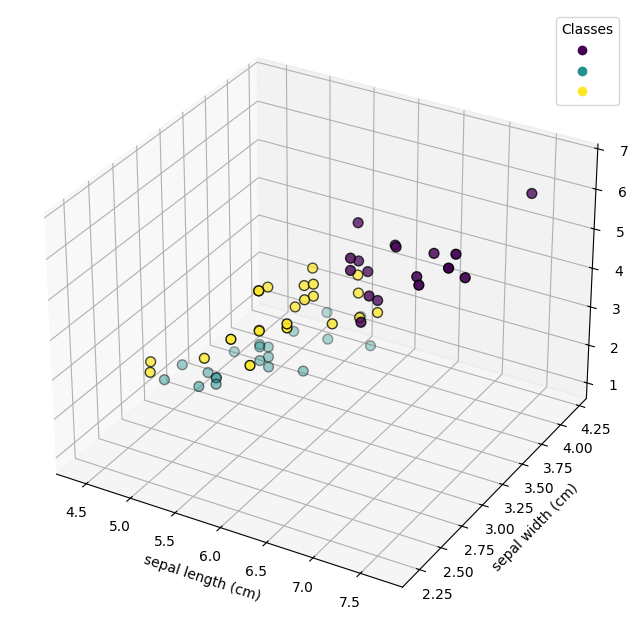

In [79]:
skmodel = KMeans(
  n_clusters=3,
  init='k-means++',
  n_init='auto',
  max_iter=300,
  tol=0.0001,
  verbose=0,
  random_state=None,
  copy_x=True,
  algorithm='lloyd',
)
skmodel.fit(X_train)
preds_2 = skmodel.predict(X_test)
cluster_coords = skmodel.cluster_centers_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_test[:, 0], X_test[:, 1], X_test[:, 2],
    c=preds_2, cmap='viridis', s=50, edgecolor='k'
)

ax.legend(handles=scatter.legend_elements()[0],  loc="upper right", title="Classes")

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])

plt.show()

The cluster plots from the custom KMeans algorithm and the sklearn KMeans algorithm appear very similar with very few of the classifications having different colors from each other.

Varying the number of clusters essentially creates another classification which isn't actually there. Because there are only 3 types of flowers, adding more clusters would be seemingly meaningless. Though, adding more clusters may allow for some clusters to be combined into others under the same class, possibly improving the algorithm.

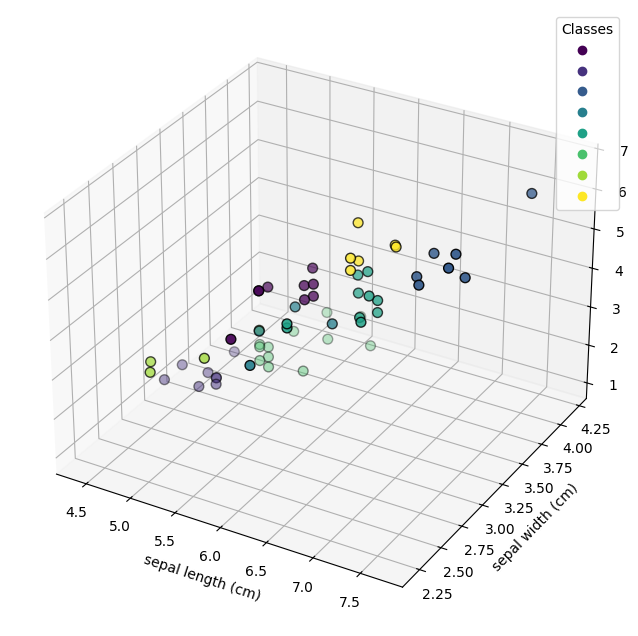

In [80]:
skmodel = KMeans(
  n_clusters=8,
  init='k-means++',
  n_init='auto',
  max_iter=300,
  tol=0.0001,
  verbose=0,
  random_state=None,
  copy_x=True,
  algorithm='lloyd',
)
skmodel.fit(X_train)
preds_2 = skmodel.predict(X_test)
cluster_coords = skmodel.cluster_centers_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_test[:, 0], X_test[:, 1], X_test[:, 2],
    c=preds_2, cmap='viridis', s=50, edgecolor='k'
)

ax.legend(handles=scatter.legend_elements()[0],  loc="upper right", title="Classes")

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])

plt.show()